In [60]:
#| label: Import-Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#| label: Scatter-Plot
np.random.seed(123)
x = 2*np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y)
plt.show()

In [62]:
#| label: Linear-Algebra
# Create Intercept
X = np.hstack([np.ones((100,1)),x])
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [63]:
#| label: Scikit-Learn-Linear-Regression
#| include: false
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
# Time complexity is O(n^2), which is very slow 

LinearRegression()

In [64]:
#| label: Gradient-Descent
#| include: false
# minimize the cost function(Loss function)
# Learning rate is small, it might take a longer time to converge, vice versa.
# When using Gradient Descent, you should ensure that all features have a similar scale
# Batch Gradient Descent: whole data set to update the step, fixed learning rate
# Stochastic Gradient Descent: random and single data to update the step Shuffile is very important
# Gradually reduce the learning rate. The steps start out large then get smaller and smaller
# Mini-Batch Gradient Descent: small random sets of instances 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x,y.reshape(-1))

SGDRegressor(eta0=0.1, penalty=None)

In [65]:
from IPython.display import Markdown
from tabulate import tabulate
table = [["Normal Equation", beta_hat[0][0], beta_hat[1][0]],
         ["SVD", lin_reg.intercept_[0], lin_reg.coef_[0][0]],
         ["SGD", sgd_reg.intercept_[0], sgd_reg.coef_[0]]
         ]
Markdown(tabulate(
  table, 
  headers=["Algorithm","Intercept", "Slope"]
))

Algorithm          Intercept    Slope
---------------  -----------  -------
Normal Equation      4.55903  2.94624
SVD                  4.55903  2.94624
SGD                  4.49691  3.00439

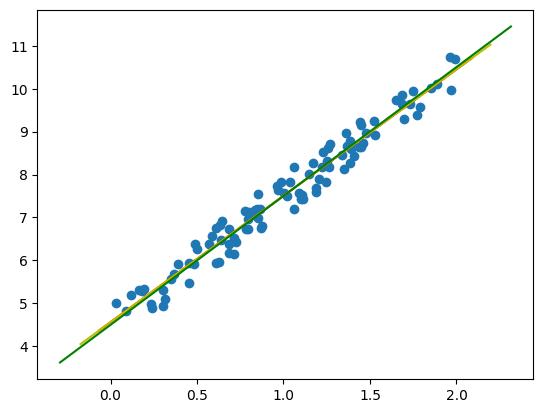

In [73]:
#| label: Predicted-Rgression
def abline(slope, intercept, color, label):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color)
plt.scatter(x,y)
abline(beta_hat[1][0], beta_hat[0][0], color = "r-", label = "Normal Equaation")
abline(lin_reg.coef_[0][0], lin_reg.intercept_[0], color = "y-", label = "SVD")
abline(sgd_reg.coef_[0], sgd_reg.intercept_[0], color = "g-", label = "SGD")
plt.show()